<a href="https://colab.research.google.com/github/Palakbhatt/FakeNewsByPalak-Himanshi/blob/main/FakeNews_Detection_Palak%26Himanshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [4]:
from google.colab import files
uploaded=files.upload()

Saving news.csv to news.csv


In [7]:
df = pd.read_csv('news.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [11]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [12]:
df.shape

(6335, 4)

In [13]:
df=df.sample(frac=1)
df.head(10)

,Unnamed: 0,title,text,label
2564,1729,Why Marco Rubio has a real shot at 2016 Republ...,Ted Cruz remains a conservative favorite in 20...,REAL
2617,363,11 service members in Black Hawk crash presume...,The 11 service members who were onboard a Blac...,REAL
5253,8750,MSNBC Makes Huge Mistake After Trying To Catch...,[LISTEN] Clinton’s Shocking Response To Claim ...,FAKE
6198,4530,Suspect who worked for wealthy DC family arres...,Daron Dylon Wint was arrested Thursday by a fu...,REAL
2016,276,Kevin McCarthy drops out of House speaker race,Washington (CNN) House Majority Leader Kevin M...,REAL
5672,9224,President-elect Donald Trump eyes Ovala Office...,"November 11, 2016 President-elect Donald Trump...",FAKE
4408,8480,Debate: Washington's Syria policy,The Debate Washington's Syria policy \nIn this...,FAKE
3116,7211,"“We are losing control of the streets,” say po...",BNI Store Nov 2 2016 “We are losing control of...,FAKE
5099,2474,ObamaCare 2015: Harvard faculty outraged over ...,"Turns out there’s no free lunch, even if you’r...",REAL
3345,1878,Marco Rubio’s big gamble,Sen. Marco Rubio (R-Fla.) is officially in for...,REAL


In [14]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [15]:
# Removing the special characters

def word_drop(text):
  text=text.lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub('\\W'," ",text)
  text=re.sub('https?://\S+\|www\.\S+', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  return text

In [16]:
df["text"]=df["text"].apply(word_drop)

In [17]:
# Removing the title (we will only use the text)

df.drop(["title"],axis=1,inplace=True)

In [18]:
df.head(10)

,Unnamed: 0,text,label
2564,1729,ted cruz remains a conservative favorite in ...,REAL
2617,363,the service members who were onboard a black ...,REAL
5253,8750,clinton s shocking response to claim he slept...,FAKE
6198,4530,daron dylon wint was arrested thursday by a fu...,REAL
2016,276,washington cnn house majority leader kevin m...,REAL
5672,9224,november president elect donald trump eyes ...,FAKE
4408,8480,the debate washington s syria policy in this ...,FAKE
3116,7211,bni store nov we are losing control of the ...,FAKE
5099,2474,turns out there s no free lunch even if you r...,REAL
3345,1878,sen marco rubio r fla is officially in for...,REAL


In [19]:
# Convert to lowercase

df['text'] = df['text'].apply(lambda x: x.lower())

In [20]:
df.head()

,Unnamed: 0,text,label
2564,1729,ted cruz remains a conservative favorite in ...,REAL
2617,363,the service members who were onboard a black ...,REAL
5253,8750,clinton s shocking response to claim he slept...,FAKE
6198,4530,daron dylon wint was arrested thursday by a fu...,REAL
2016,276,washington cnn house majority leader kevin m...,REAL


In [21]:
# Removing stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
df.head()

,Unnamed: 0,text,label
2564,1729,ted cruz remains conservative favorite establi...,REAL
2617,363,service members onboard black hawk helicopter ...,REAL
5253,8750,clinton shocking response claim slept black be...,FAKE
6198,4530,daron dylon wint arrested thursday fugitive ta...,REAL
2016,276,washington cnn house majority leader kevin mcc...,REAL


# **EXPLORATORY DATA ANALYSIS**

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


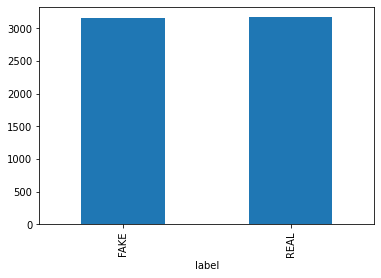

In [23]:
# How many fake and real articles?

print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

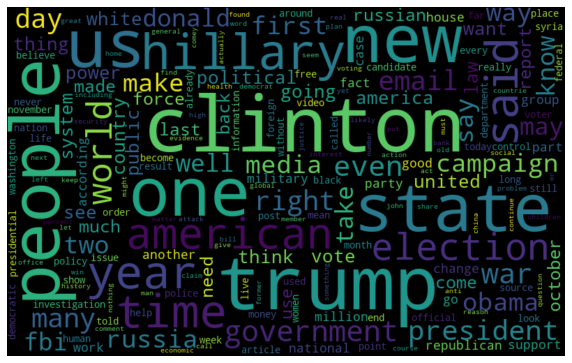

In [24]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["label"] == "FAKE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

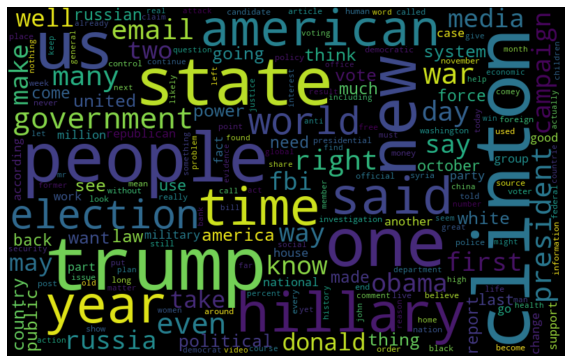

In [25]:
# Word cloud for real news

from wordcloud import WordCloud

real_data = df[df["label"] == "TRUE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **MODELLING**

In [26]:
x=df['text']
y=df['label']

In [27]:
# Split the data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)

In [28]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [29]:
# Function to plot the confusion matrix 

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Naive Bayes**

In [30]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.32%


Confusion matrix, without normalization


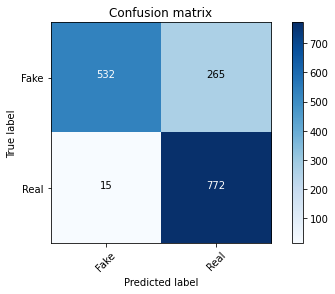

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree Classifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [34]:
DT.score(xv_test, y_test)

0.7973484848484849

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 30, #30
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.87%


Confusion matrix, without normalization


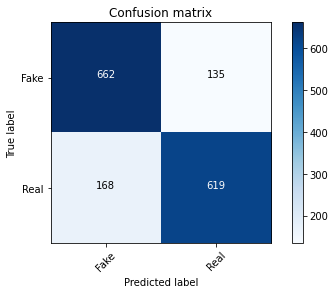

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)
LR.score(xv_test, y_test)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 30, #30
                                           splitter='best', 
                                           random_state=42))])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Logistic'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.87%


Confusion matrix, without normalization


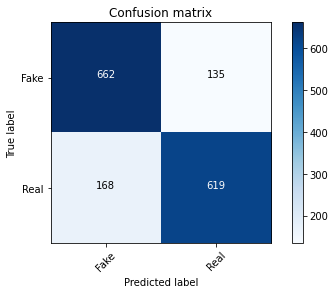

In [39]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Random Forest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

print(RFC.score(xv_test, y_test)*100)
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

90.27777777777779


Confusion matrix, without normalization


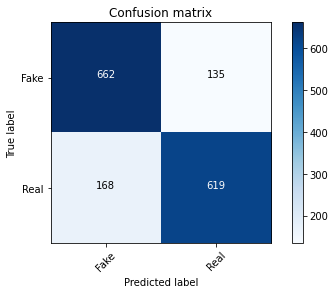

In [41]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SUPPORT VECTOR MACHINE (SVM)

In [42]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 94.0%


Confusion matrix, without normalization


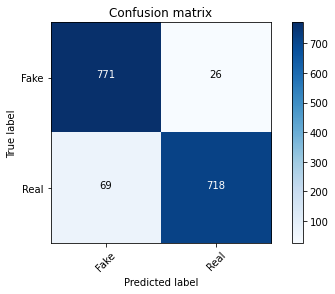

In [43]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

([<matplotlib.axis.YTick at 0x7f6896a33750>,
 <a list of 7 Text major ticklabel objects>)

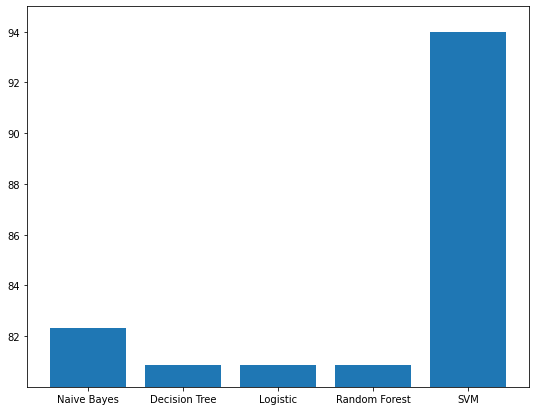

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(80,95)
plt.yticks((82, 84, 86, 88, 90, 92, 94))